In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import TypedDict, Annotated

from langgraph.graph import StateGraph, add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

from langchain_openai import ChatOpenAI

from langchain_community.tools import TavilySearchResults

In [3]:
# 메모리
memory = MemorySaver()

# tool
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool_node = ToolNode(tools)

# llm
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [4]:
# 클래스 정의
class State(TypedDict):
    messages: Annotated[list, add_messages]


# 챗봇 함수 정의
def chatbot(state:State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": [result]}


In [5]:
# 그래프 만들기
graph_builder = StateGraph(State)

# 노드
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

# 엣지
#graph_builder.add_edge("chatbot", "tools")
graph_builder.add_edge("tools", "chatbot")

graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

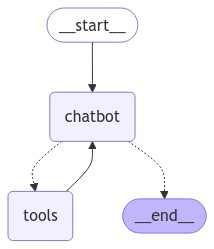

In [6]:
# 그래프 그림 그리기
from IPython.display import display, Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [7]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "안녕 난 재호야. 나는 진원이랑 결혼할거야"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='e35c0e45-f731-4dd1-8c6a-dc06d25d1157'),
  AIMessage(content='안녕하세요, 재호님! 결혼 소식 정말 축하드립니다! 진원님과 함께 행복한 미래를 만들어 가시길 바랍니다. 결혼 준비는 잘 진행되고 있나요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 95, 'total_tokens': 137, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d1051fa-de79-4b90-a982-780516cf1a0d-0', usage_metadata={'input_tokens': 95, 'output_tokens': 42, 'total_tokens': 137})]}

In [8]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 첫번째 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='e35c0e45-f731-4dd1-8c6a-dc06d25d1157'),
  AIMessage(content='안녕하세요, 재호님! 결혼 소식 정말 축하드립니다! 진원님과 함께 행복한 미래를 만들어 가시길 바랍니다. 결혼 준비는 잘 진행되고 있나요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 95, 'total_tokens': 137, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d1051fa-de79-4b90-a982-780516cf1a0d-0', usage_metadata={'input_tokens': 95, 'output_tokens': 42, 'total_tokens': 137}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='9c6f7823-9487-4195-872a-ed1f85f8dfbe'),
  AIMessage(content='재호님, 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식에 대해 말씀해주셨죠! 더 궁금한 점이나 이야기하고 싶은 내용이 있다면 언제든지 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 153, 'total_tokens': 

In [9]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 두번째 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='e35c0e45-f731-4dd1-8c6a-dc06d25d1157'),
  AIMessage(content='안녕하세요, 재호님! 결혼 소식 정말 축하드립니다! 진원님과 함께 행복한 미래를 만들어 가시길 바랍니다. 결혼 준비는 잘 진행되고 있나요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 95, 'total_tokens': 137, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d1051fa-de79-4b90-a982-780516cf1a0d-0', usage_metadata={'input_tokens': 95, 'output_tokens': 42, 'total_tokens': 137}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='9c6f7823-9487-4195-872a-ed1f85f8dfbe'),
  AIMessage(content='재호님, 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식에 대해 말씀해주셨죠! 더 궁금한 점이나 이야기하고 싶은 내용이 있다면 언제든지 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 153, 'total_tokens': 

In [10]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "현재 마이크로소프트 주식은 얼마야?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='e35c0e45-f731-4dd1-8c6a-dc06d25d1157'),
  AIMessage(content='안녕하세요, 재호님! 결혼 소식 정말 축하드립니다! 진원님과 함께 행복한 미래를 만들어 가시길 바랍니다. 결혼 준비는 잘 진행되고 있나요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 95, 'total_tokens': 137, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d1051fa-de79-4b90-a982-780516cf1a0d-0', usage_metadata={'input_tokens': 95, 'output_tokens': 42, 'total_tokens': 137}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='9c6f7823-9487-4195-872a-ed1f85f8dfbe'),
  AIMessage(content='재호님, 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식에 대해 말씀해주셨죠! 더 궁금한 점이나 이야기하고 싶은 내용이 있다면 언제든지 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 153, 'total_tokens': 

In [11]:
config = {"configurable": {"thread_id": "1"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

User:  
Assistant:  Hello! How can I assist you today?
User:  
Assistant:  It seems like your message didn't come through. How can I help you?
User:  안녕
Assistant:  안녕하세요! 무엇을 도와드릴까요?
Goodbye!


In [12]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='', id='08c2de4d-7bb3-4783-9c5d-1550721d5092'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 79, 'total_tokens': 89, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_74ba47b4ac', 'finish_reason': 'stop', 'logprobs': None}, id='run-682e3967-ed8d-43a4-bf79-381ac2e330a0-0', usage_metadata={'input_tokens': 79, 'output_tokens': 10, 'total_tokens': 89}), HumanMessage(content='', id='73118a6e-8aed-4e3b-a946-4716a7e0a1af'), AIMessage(content="It seems like your message didn't come through. How can I help you?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 96, 'total_tokens': 112, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'sys

# 기억할 메세지 개수 제한하기

In [13]:
# 메세지를 리스트로 받았을때 2개만 받기. 이 함수를 chatbot에 넣어서 최근 2개만 기억하도록 한다.
def filter_messages(messages: list):
    return messages[-2:]

def chatbot(state: State):
    messages = filter_messages(state['messages'])
    result = llm_with_tools.invoke(messages)
    return {"messages": [result]}

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

In [14]:
config = {"configurable": {"thread_id": "20"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

Goodbye!


In [15]:
config = {"configurable": {"thread_id": "10"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

Goodbye!


In [16]:
config = {"configurable": {"thread_id": "15"}}

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("GoodBye")
        break
    for envent in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User_input: ", user_input)
            print("Assistant: ", value["messages"][-1].content)


GoodBye


In [17]:
config = {"configurable": {"thread_id": "15"}}

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("GoodBye")
        break
    for envent in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.keys():
            print("User_input: ", user_input)
            print("Assistant: ", value)


GoodBye
